# Fire Detection System with YOLO

In this fire detection system, it leverages a You Only Look Once (YOLO) deep learning model to identify the presence of fire in images. YOLO is a powerful object detection algorithm known for its speed and accuracy.

Fire detection system can play a crucial role in ensuring public safety and minimizing property damage. Some potential applications of YOLO-based fire detection model might help real-time fire alarms in buildings, which can be integrated into surveillance systems to trigger alarms upon detecting fire in real-time. Additionally, deploying the model with cameras strategically placed in forests can enable early detection of wildfires.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("roboflow")

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="secret_value_0")
project = rf.workspace("ayaramis").project("fire-vqbia")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20


Extracting Dataset Version Zip to FIRE-1 in yolov8:: 100%|██████████| 11432/11432 [00:01<00:00, 6853.21it/s]


## Custom Training

In [5]:
pwd

'/kaggle/working'

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 147MB/s]
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/FIRE-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_st

In [11]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch4515.jpg
R_curve.png					   train_batch4516.jpg
args.yaml					   train_batch4517.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1715278224.c4c39d05c61c.131.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


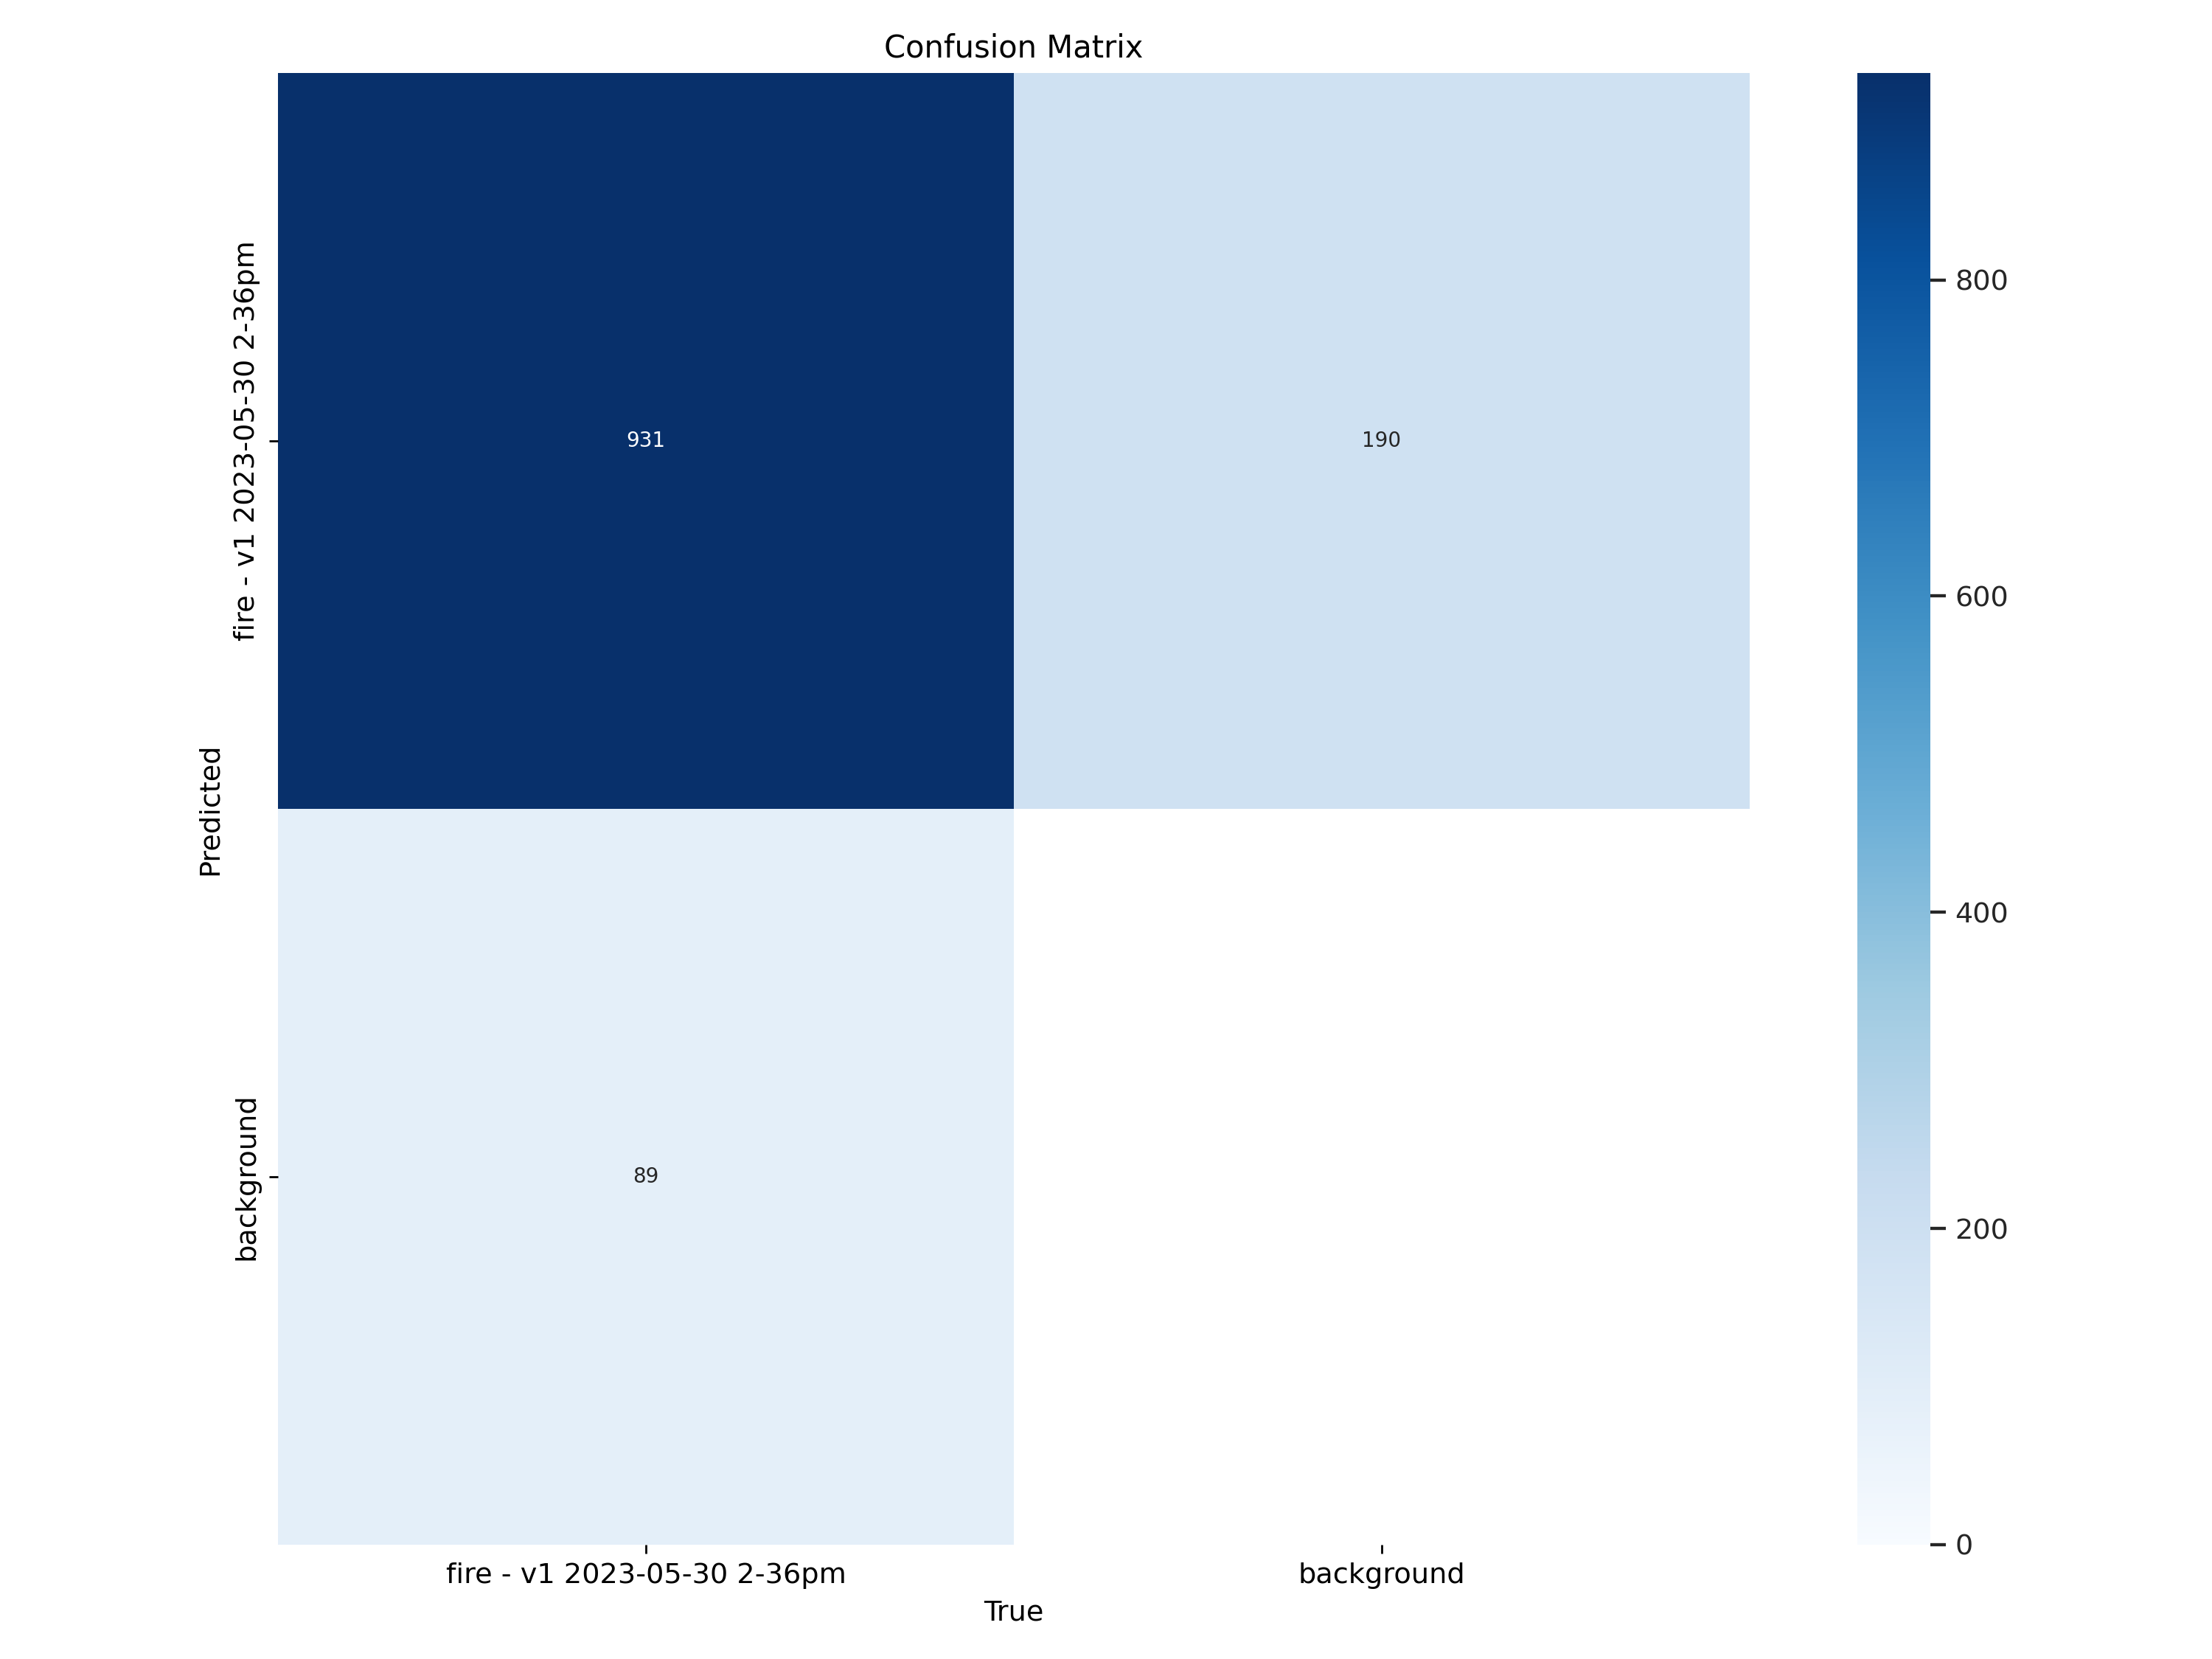

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


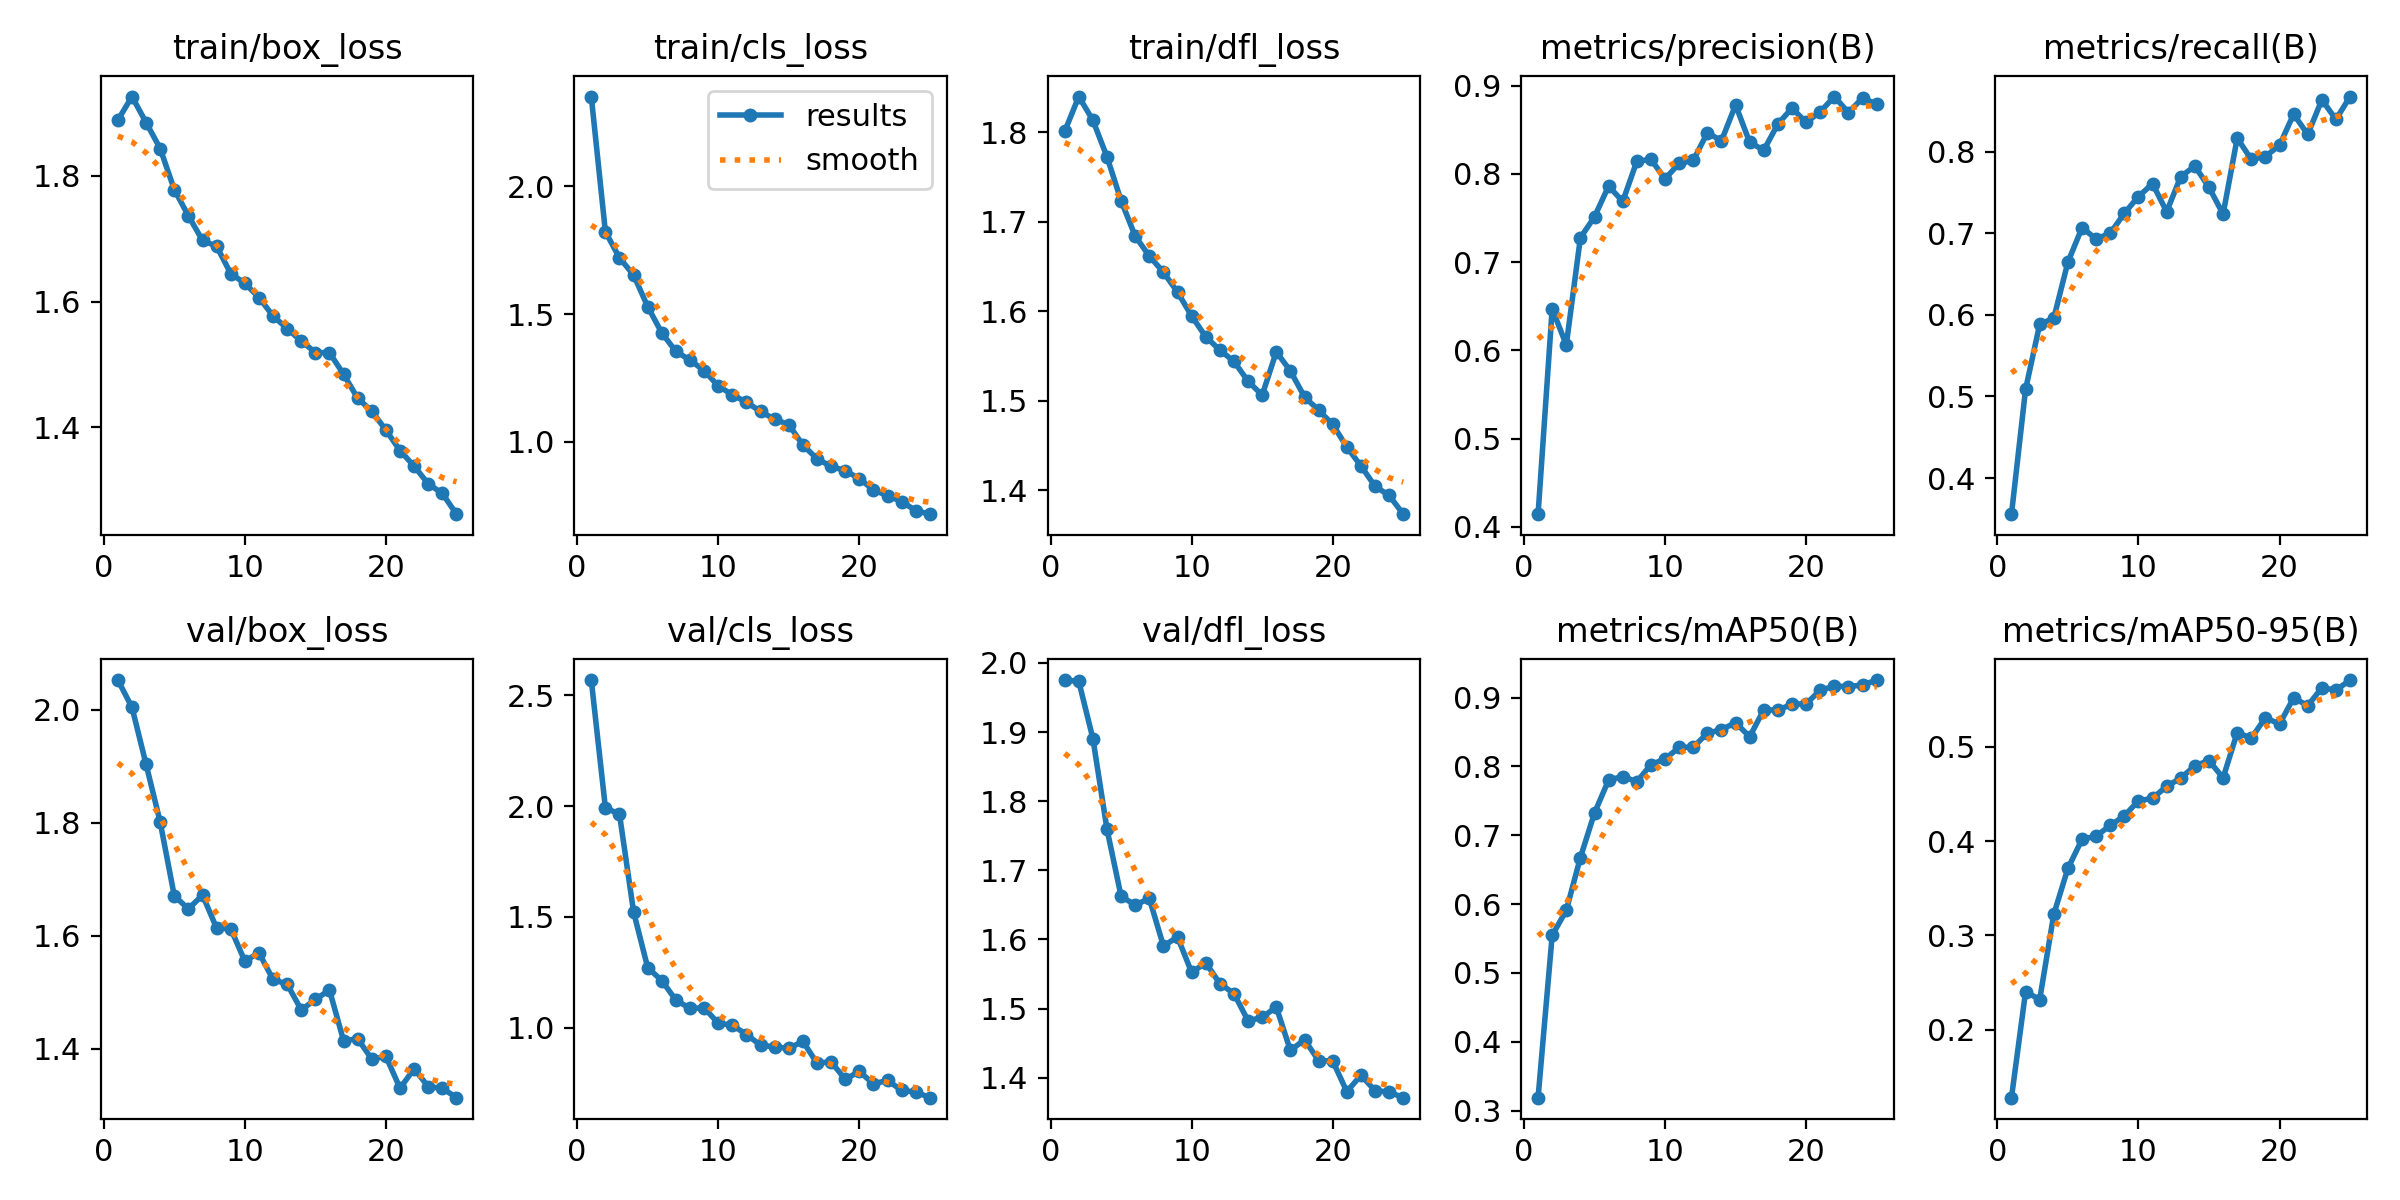

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


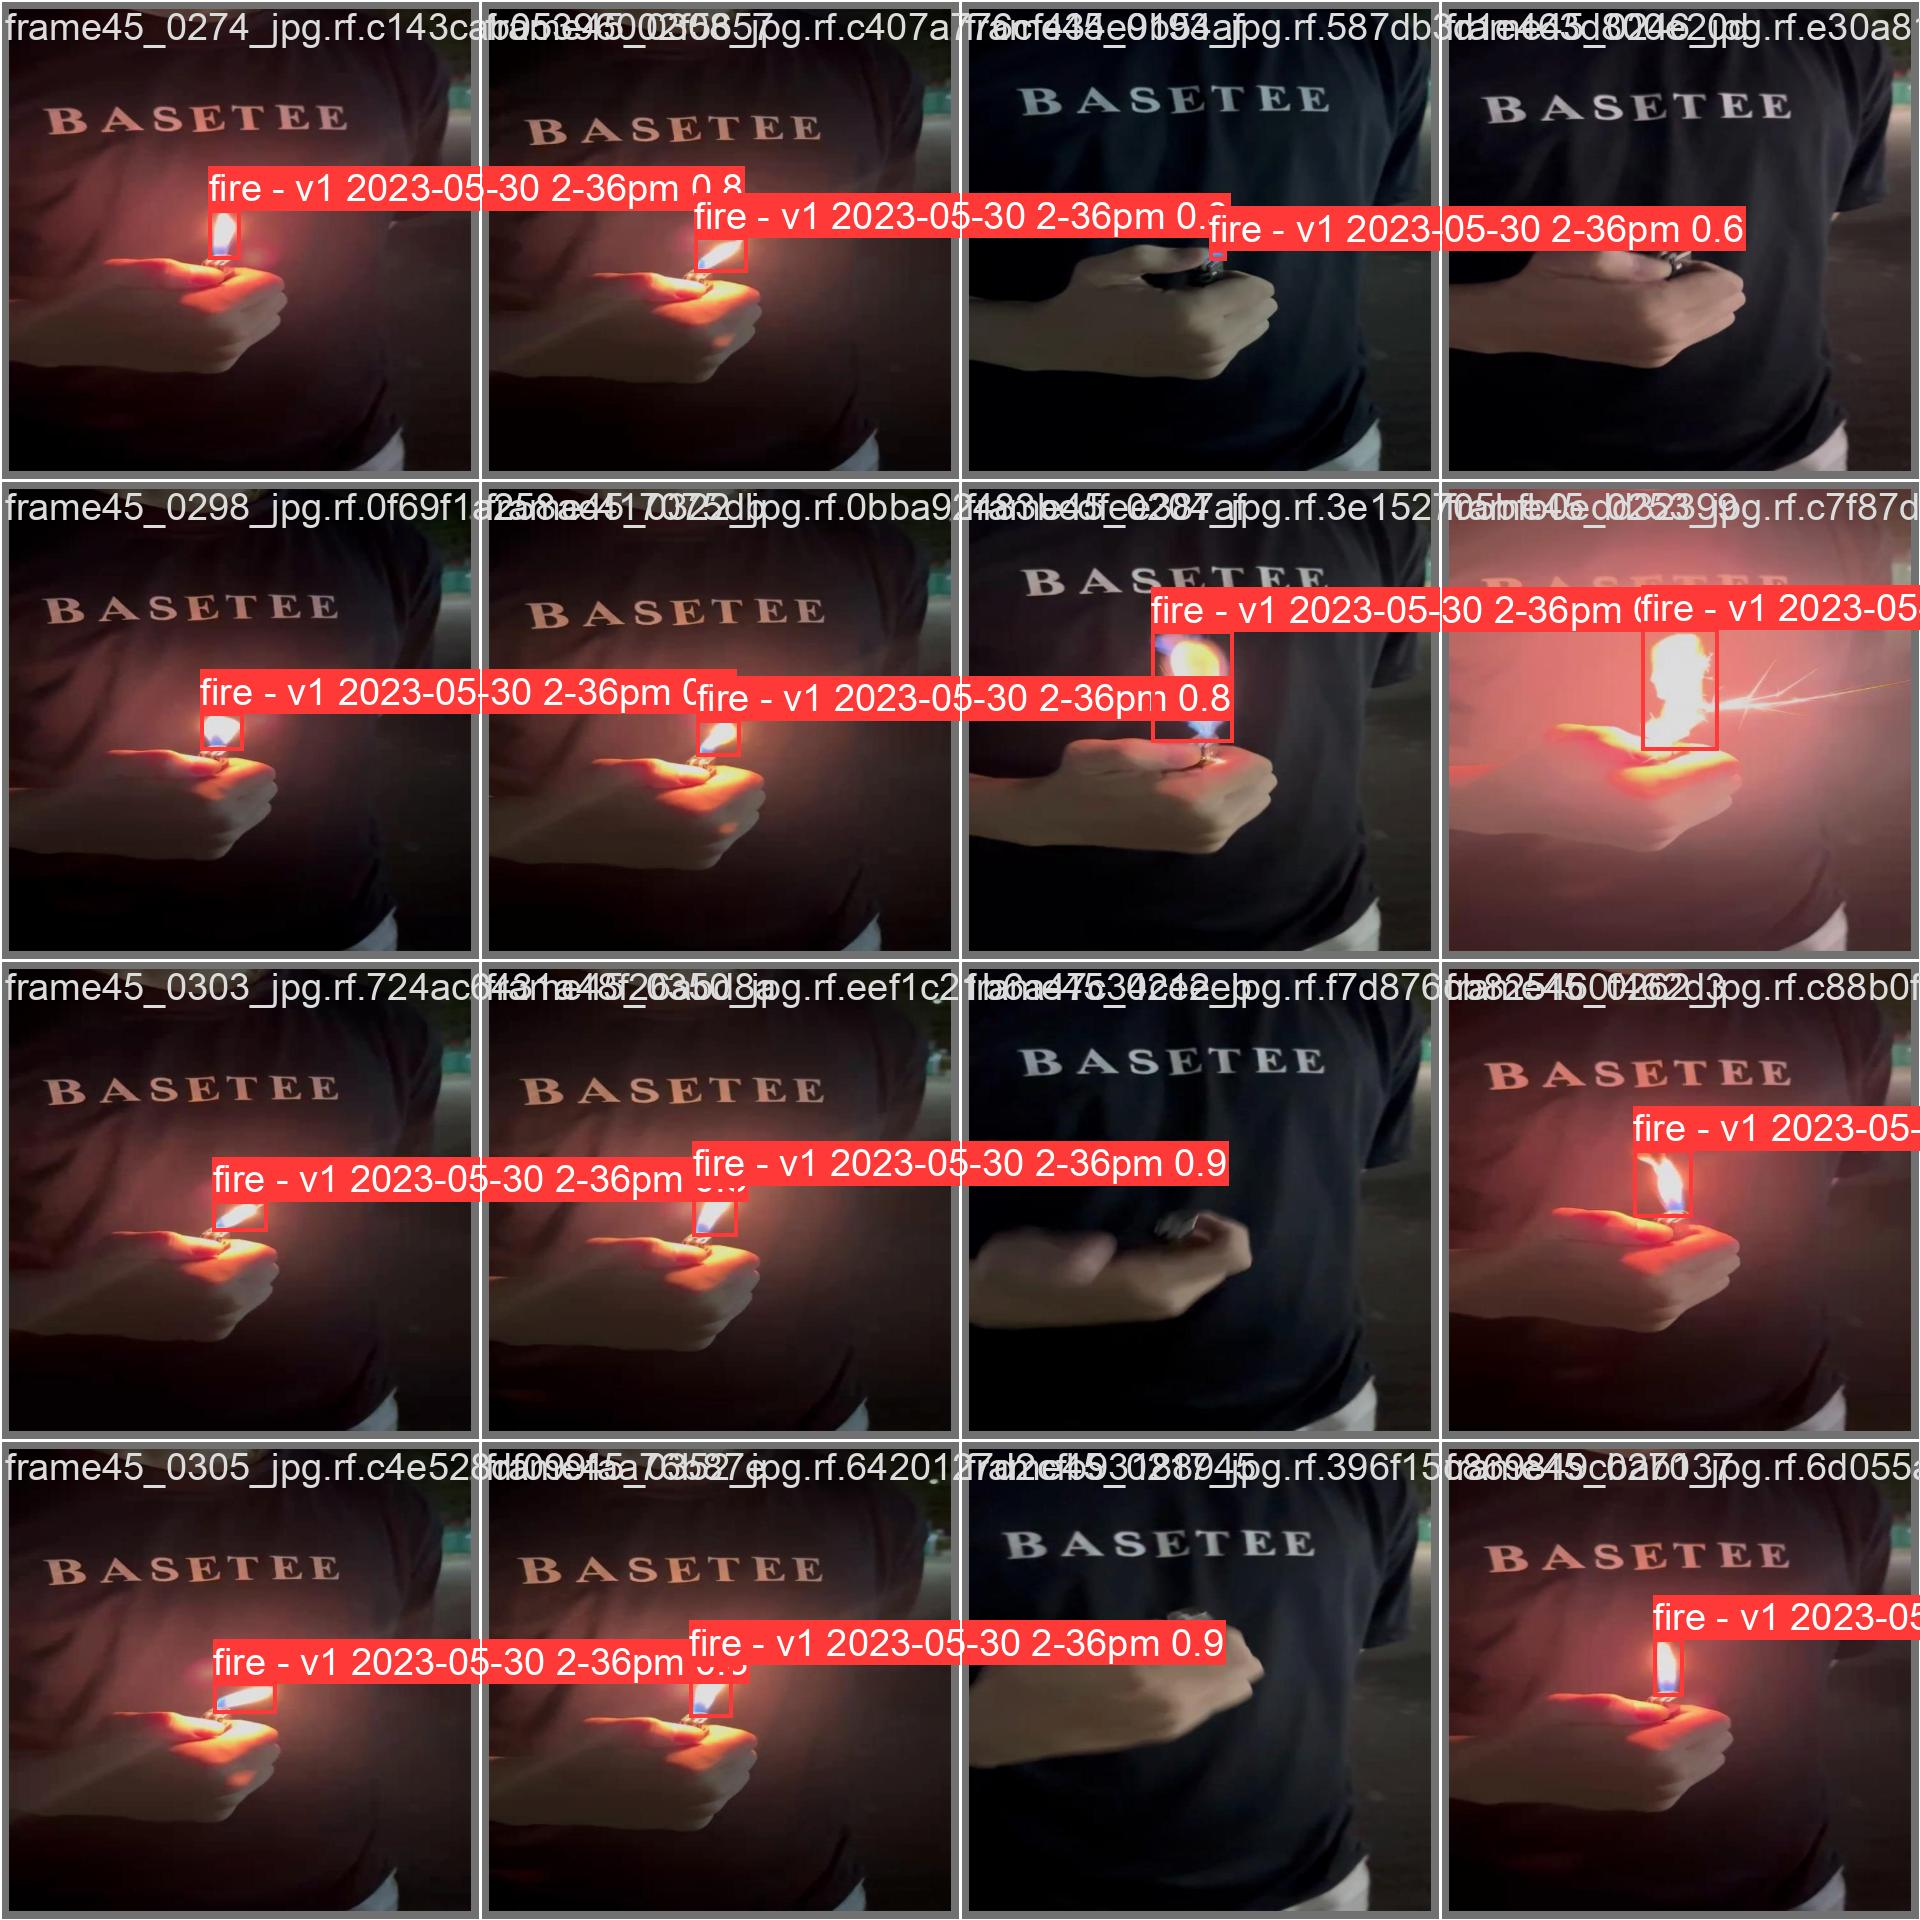

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/FIRE-1/valid/labels.cache... 601 images, 5 backgro
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        601       1020      0.878      0.869      0.928      0.571
Speed: 1.1ms preprocess, 13.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/301 /kaggle/working/FIRE-1/test/images/Img_1021_jpg.rf.51ff2cdd088b87a6b1730d5bc455841a.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 23.8ms
image 2/301 /kaggle/working/FIRE-1/test/images/Img_1024_jpg.rf.bc0a906acb153eadc21009f4bcaca485.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 22.7ms
image 3/301 /kaggle/working/FIRE-1/test/images/Img_1027_jpg.rf.9abd09e4700bf9353ed7943ae878cd3e.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 22.7ms
image 4/301 /kaggle/working/FIRE-1/test/images/Img_102_jpg.rf.28523eb46db5510c971eda9f1937e5f4.jpg: 800x800 2 fire - v1 2023-05-30 2-36pms, 22.6ms
image 5/301 /kaggle/working/FIRE-1/test/images/Img_1034_jpg.rf.d8ad074554c3befba57b81830e904658.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 22.7ms
image 6/301 /kaggle/working/FIRE-1/test/ima

**NOTE:** Let's take a look at few results.

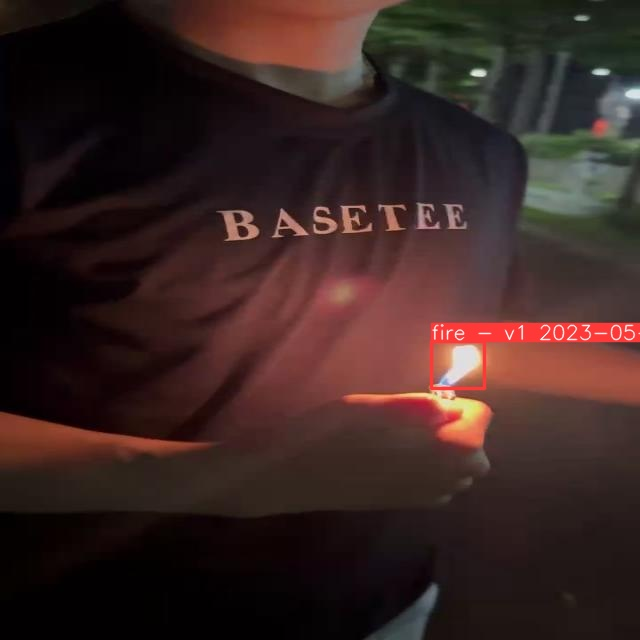

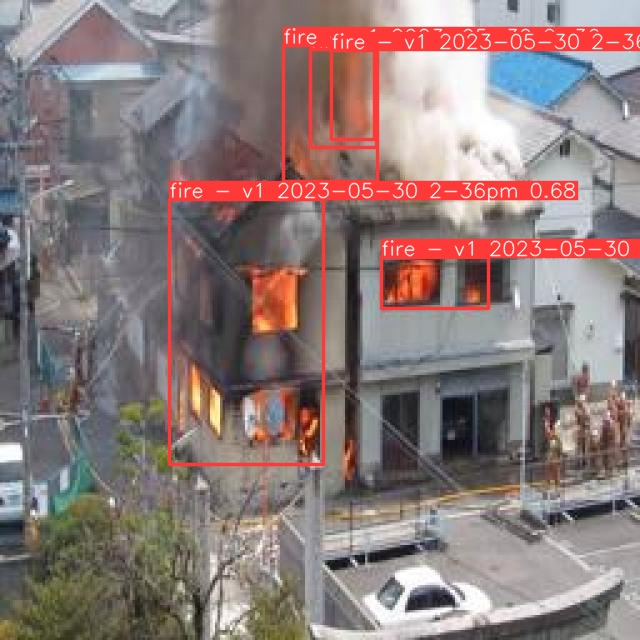

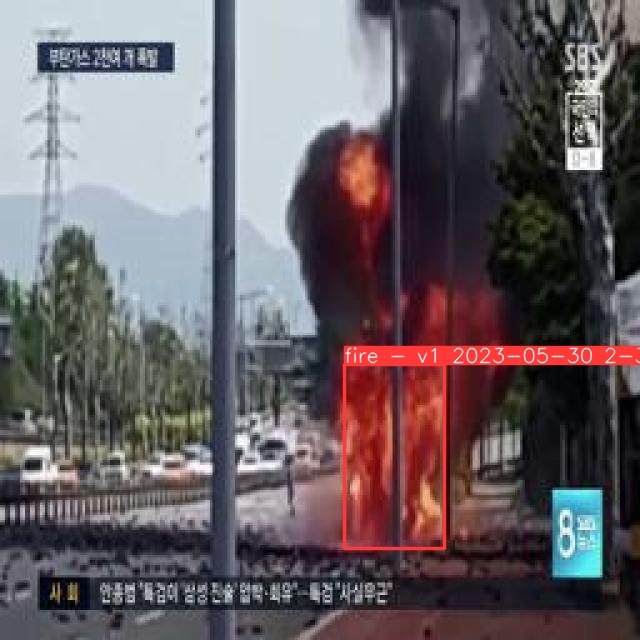

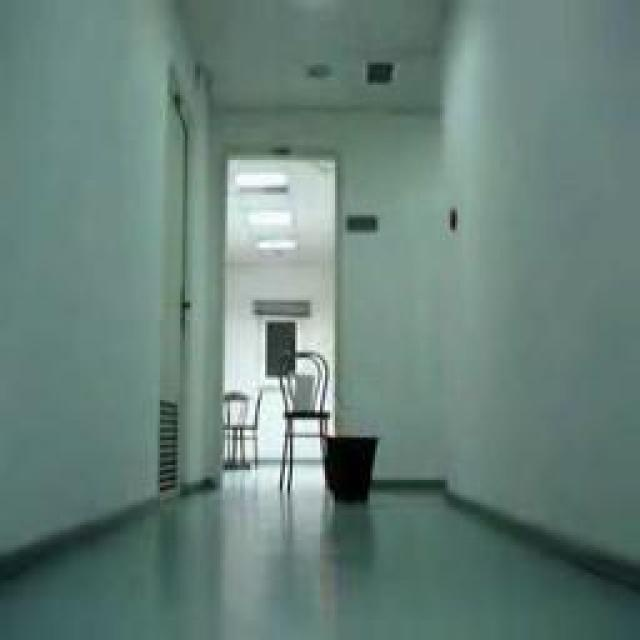

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[3:7]:
      display(Image(filename=image_path, width=600))
      print("\n")